In [683]:
using Distributions
using Plots
using ColorSchemes
using LaTeXStrings
using Random
using Interpolations
pyplot()

Plots.PyPlotBackend()

In [684]:
std1 = Normal(0.3, 0.05+0.05*0.3);
std2 = Normal(0.6, 0.05+0.05*0.6);

In [685]:
x = -0.1:0.002:1.1;
y1 = pdf.(std1, x);
y2 = pdf.(std2, x);
y3 = x .* 0. .+ 1.;
y3 = Array(y3);
mask = (x .< 0. ) .| (x .> 1.)
y3[mask] .= 0.;

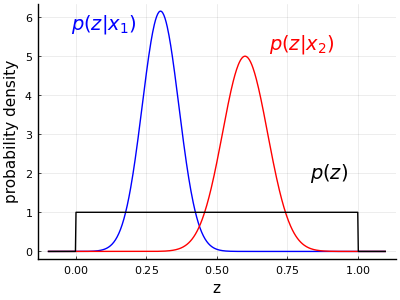

In [686]:
default(legend = :topright, background_color_legend = nothing, foreground_color_legend = nothing, size = (400, 300))
plot(x, y1,lc = :blue, label = L"p(z|x_1)", leg = false)
plot!(x, y2, lc = :red, label = L"p(z|x_2)")
plot!(x, y3, lc = :black, label = L"p(z)")
xlabel!("z")
ylabel!("probability density")
annotate!(0.9, 1.7, text(L"p(z)", :bottom))
annotate!(0.8, 5, text(L"p(z|x_2)", :bottom, :red))
annotate!(0.1, 5.5, text(L"p(z|x_1)", :bottom, :blue))

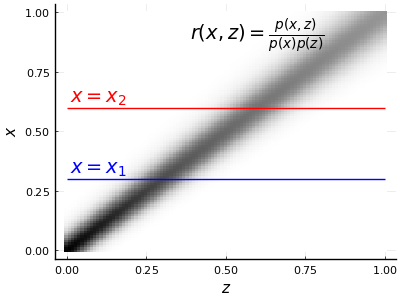

In [687]:
f(x,y) = sin(3x) * cos(x+y)
f(x,y) = pdf.(Normal(x, 0.05+0.05 .* y), y)

default(legend = :topright, size = (400, 300))
x = 0:0.01:1
z = 0:0.01:1
heatmap(x, z, f, leg = false, seriescolor=cgrad(ColorSchemes.Greys_9))
plot!([0, 1], [0.3, 0.3], leg = false, lc = :blue)
plot!([0, 1], [0.6, 0.6], leg = false, lc = :red)
annotate!(0.6, 0.9, text(L"r(x, z)=\frac{p(x, z)}{p(x)p(z)}", :center))
annotate!(0.1, 0.3, text(L"x=x_1", :center, :bottom, :blue))
annotate!(0.1, 0.6, text(L"x=x_2", :center, :bottom, :red))
xlabel!(L"z")
ylabel!(L"x")
#yticks!([0.3, 0.6], [L"x_1", L"x_2"])

In [688]:
N = 100000
r = rand(Uniform(0., 1.), 2*N);
r = reshape(r, (N, 2))
w = f.(r[:,1], r[:,2])
w_max = maximum(w)
mask = w .> rand(Uniform(0., w_max), N);
Nmasked = sum(mask);
zr = r[mask,1]
xr = r[mask,2]
zs = shuffle(zr);
xs = shuffle(xr);
print(Nmasked)

11689

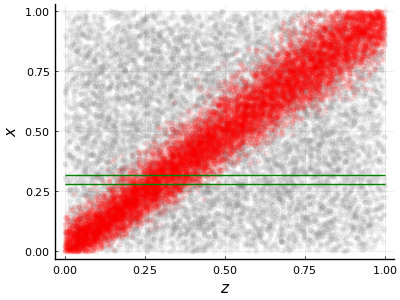

In [689]:
scatter(zs, xs, color = :grey, marker = :dot, markerstrokewidth = 0, alpha = 0.1)
scatter!(zr, xr, color = :red, markerstrokewidth = 0, leg = false, alpha = 0.1)
xlabel!(L"z")
ϵ = 0.02
ylabel!(L"x")
plot!([0, 1], [0.3-ϵ, 0.3-ϵ], leg = false, lc = :green)
plot!([0, 1], [0.3+ϵ, 0.3+ϵ], leg = false, lc = :green)

ABC samples:453

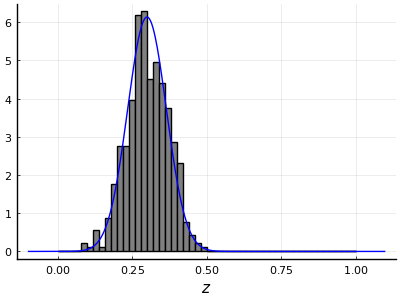

In [690]:
x = -0.1:0.002:1.1;
y1 = pdf.(std1, x);
y2 = pdf.(std2, x);
y3 = x .* 0. .+ 1.;
y3 = Array(y3);
mask = (x .< 0. ) .| (x .> 1.)
y3[mask] .= 0.;

mask2 = (xr .> 0.3-ϵ) .& (xr .< 0.3+ϵ);
print("ABC samples:", sum(mask2))
histogram(zr[mask2], bins = 0:0.02:1, leg = false, range = [0., 1.], fillcolor = :gray, normalize = true)
xlabel!(L"z")
plot!(x, y1,lc = :blue, label = L"p(z|x_1)", leg = false)

In [691]:
x = Array(-0.1:0.002:1.1);
y1 = x.*0;
y1[0 .< x .< 1] .+= 1.;
y1[0.5 .< x .< 1] .+= 1.;
y1[0.25 .< x .< 1] .+= 1.;
y1[0.25 .< x .< 1] .+= x[0.25 .< x .< 1];
y2 = x.*0;
y2[.35 .< x .< .7] .+= 3.;

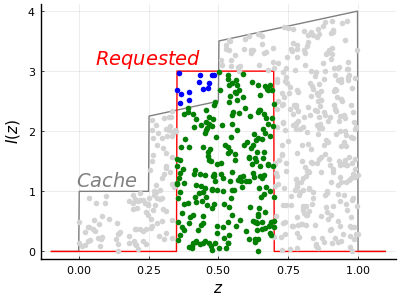

In [692]:
default(legend = :topleft, background_color_legend = nothing, foreground_color_legend = nothing, size = (400, 300))
plot(x, y1, lc = :gray, label = "")
plot!(x, y2, lc = :red, label = "")
xlabel!(L"z")
ylabel!(L"I(z)")

N = 1000
zrr = rand(Uniform(0., 1.), N);
Irr = rand(Uniform(0., 4.), N);

itp1 = LinearInterpolation(x, y1);
mask = itp1(zrr) .> Irr;
scatter!(zrr[mask], Irr[mask], markerstrokewidth = 0, color = :lightgray, label = "")

itp2 = LinearInterpolation(x, y2);
mask = (itp2(zrr) .> Irr) .& (itp1(zrr) .> Irr)
scatter!(zrr[mask], Irr[mask], markerstrokewidth = 0, color = :green, label = "")


itp2 = LinearInterpolation(x, y2);
mask = (itp2(zrr) .> Irr) .& (itp1(zrr) .< Irr)
scatter!(zrr[mask], Irr[mask], markerstrokewidth = 0, color = :blue, label = "")

annotate!(0.1, 1, text(L"Cache", :bottom, :gray))
annotate!(0.25, 3, text(L"Requested", :bottom, :red))